In [1]:
%matplotlib inline

import math, time, random, datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import train & test data 
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')


## Data Descriptions

**Employee_ID** 	Unique ID of each employee

**Age** 	Age of each employee

**Unit** 	Department under which the employee work

**Education** 	Rating of Qualification of an employee (1-5)

**Gender** 	Male-0 or Female-1

**Decision_skill_possess** 	Decision skill that an employee possesses

**Post_Level** 	Level of the post in an organization (1-5)

**Relationship_Status** 	Categorical Married or Single 

**Pay_Scale** 	Rate in between 1 to 10

**Time_of_service** 	Years in the organization

**growth_rate** 	Growth rate in percentage of an employee

**Time_since_promotion** 	Time in years since the last promotion

**Work_Life_balance** 	Rating for work-life balance given by an employee.

**Travel_Rate** 	Rating based on travel history(1-3)

**Hometown** 	Name of the city

**Compensation_and_Benefits**	Categorical Variabe

**VAR1 - VAR5** 	Anominised variables

**Attrition_rate(TARGET VARIABLE)** 	Attrition rate of each employee

In [3]:
train.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [4]:
train.shape

(7000, 24)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [6]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
VAR4,656,9.4
VAR2,577,8.2
Age,412,5.9
Time_of_service,144,2.1
Work_Life_balance,11,0.2


In [7]:
train.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

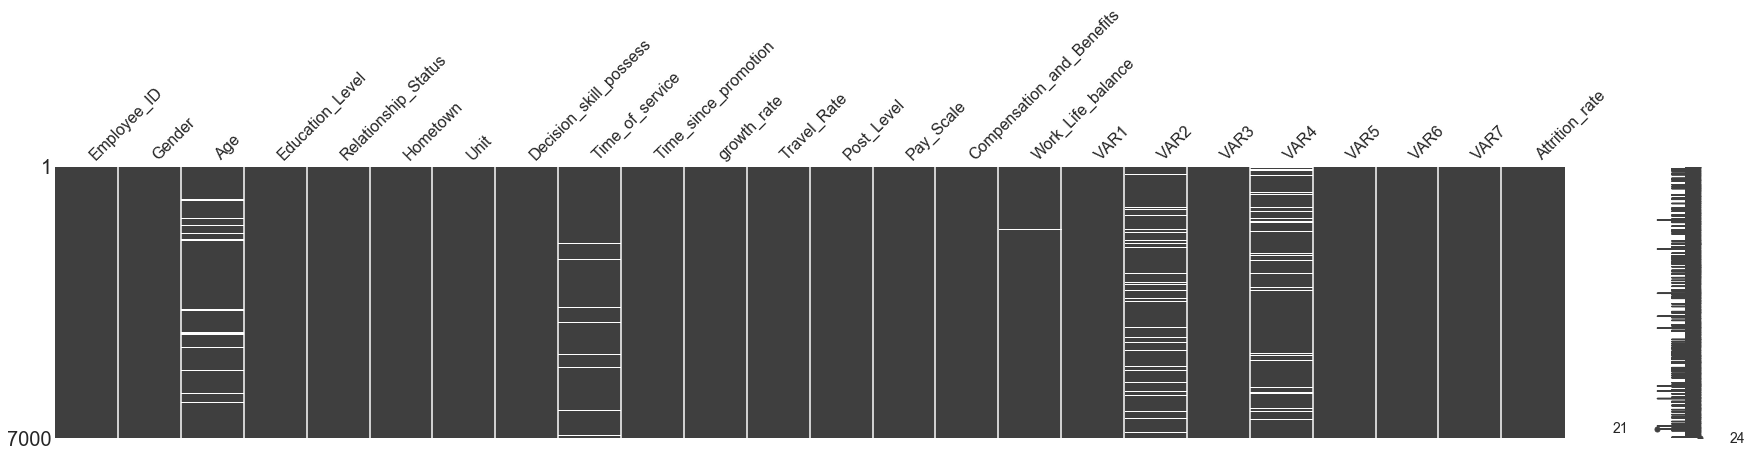

In [8]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,5))

In [9]:
train.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [10]:
train.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [11]:
test.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7'],
      dtype='object')

In [12]:
df_train = train.copy()

In [13]:
df_test= test.copy()

In [14]:
cat_col=['Gender','Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
               'Compensation_and_Benefits']

# Numerical Dataset

In [15]:
df_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [16]:
df_train.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

### Missing Age Values

In [17]:
data = [df_train, df_test]

for dataset in data:
    mean = df_train["Age"].mean()
    std = df_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)
    
df_train["Age"].isnull().sum()


0

### Time of Service

In [18]:
df_train.Time_of_service.isnull().sum()

144

In [19]:
#missing Time of Service

data = [df_train, df_test]

for dataset in data:
    mean = df_train["Time_of_service"].mean()
    std = df_test["Time_of_service"].std()
    is_null = dataset["Time_of_service"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Time_of_service"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Time_of_service"] = age_slice
    dataset["Time_of_service"] = dataset["Time_of_service"].astype(int)
    
df_train["Time_of_service"].isnull().sum()


0

## Work Life Balance

In [21]:
data = [df_train, df_test]

for dataset in data:
    mean = df_train["Work_Life_balance"].mean()
    std = df_test["Work_Life_balance"].std()
    is_null = dataset["Work_Life_balance"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Work_Life_balance"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Work_Life_balance"] = age_slice
    dataset["Work_Life_balance"] = dataset["Work_Life_balance"]
    
df_train["Work_Life_balance"].isnull().sum()

0

## Payscale

In [23]:
df_train.Pay_Scale.value_counts()

8.0     1392
6.0     1284
5.0     1160
4.0      983
7.0      811
9.0      464
2.0      277
3.0      255
10.0     209
1.0      156
Name: Pay_Scale, dtype: int64

In [24]:
df_train[df_train['Pay_Scale'].isnull() == True]

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
445,EID_4641,M,52,3,Married,Clinton,Logistics,Behavioral,15,2,29,0,3,NaN,type3,1.0,3,0.7516,-0.4537,3.0,1,7,1,0.1803
1126,EID_16660,M,28,3,Married,Lebanon,Logistics,Directive,5,1,40,1,3,NaN,type2,3.0,1,0.7516,-1.6150,1.0,3,8,3,0.1154
1378,EID_19310,F,21,4,Single,Franklin,Sales,Directive,2,2,39,0,1,NaN,type2,1.0,2,NaN,-0.4537,2.0,3,7,4,0.0617
1997,EID_24076,M,35,3,Married,Springfield,Logistics,Directive,12,1,38,0,5,NaN,type2,3.0,3,-1.8176,0.7075,2.0,2,7,4,0.1047
3083,EID_16076,M,23,5,Married,Lebanon,Operarions,Analytical,4,1,66,0,3,NaN,type3,3.0,3,-0.9612,0.7075,2.0,3,8,4,0.1841
3777,EID_13589,M,36,4,Married,Franklin,IT,Directive,9,1,41,1,3,NaN,type2,3.0,3,0.7516,-1.6150,2.0,4,7,3,0.8597
4508,EID_11400,M,33,3,Married,Washington,Operarions,Directive,5,1,27,0,3,NaN,type2,2.0,2,-0.1048,-0.4537,1.0,3,8,5,0.0838
5958,EID_6740,F,52,3,Married,Clinton,Logistics,Conceptual,16,2,26,0,4,NaN,type3,4.0,3,0.7516,1.8688,2.0,2,8,2,0.1900
6857,EID_24697,M,47,1,Single,Franklin,Sales,Directive,23,1,56,1,4,NaN,type2,1.0,3,-0.1048,0.7075,2.0,2,8,3,0.1509


In [25]:
data = [df_train, df_test]

for dataset in data:
    mean = df_train["Pay_Scale"].mean()
    std = df_test["Pay_Scale"].std()
    is_null = dataset["Pay_Scale"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Pay_Scale"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Pay_Scale"] = age_slice
    dataset["Pay_Scale"] = dataset["Pay_Scale"].astype(int)
    
df_train["Pay_Scale"].isnull().sum()

0

## Changing Employee ID to int

In [26]:
df_train['Employee_ID'] = df_train.apply(lambda x: x['Employee_ID'][4:], axis = 1)

In [27]:
df_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,23371,F,42,4,Married,Franklin,IT,Conceptual,4,4,33,1,1,7,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,18000,M,24,3,Single,Springfield,Logistics,Analytical,5,4,36,0,3,6,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,3891,F,58,3,Married,Clinton,Quality,Conceptual,27,3,51,0,2,8,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,17492,F,26,3,Single,Lebanon,Human Resource Management,Behavioral,4,3,56,1,3,8,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,22534,F,31,1,Married,Springfield,Logistics,Conceptual,5,4,62,1,3,2,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [28]:
df_train['Employee_ID']=df_train['Employee_ID'].astype(int)

In [29]:
df_test['Employee_ID'] = df_test.apply(lambda x: x['Employee_ID'][4:], axis = 1)

In [30]:
df_test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,22713,F,32,5,Single,Springfield,R&D,Conceptual,7,4,30,1,5,4,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,9658,M,65,2,Single,Lebanon,IT,Directive,41,2,72,1,1,1,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,22203,M,52,3,Married,Springfield,Sales,Directive,21,3,25,0,1,8,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,7652,M,50,5,Single,Washington,Marketing,Analytical,11,4,28,1,1,2,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,6516,F,44,3,Married,Franklin,R&D,Conceptual,12,4,47,1,3,2,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [31]:
df_test['Employee_ID']=df_test['Employee_ID'].astype(int)

## Var 2 , Var 4

In [32]:
#missing Var2
data = [df_train, df_test]

for dataset in data:
    mean = df_train["VAR2"].mean()
    std = df_test["VAR2"].std()
    is_null = dataset["VAR2"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["VAR2"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["VAR2"] = age_slice
    dataset["VAR2"] = dataset["VAR2"].astype(int)
    
df_train["VAR2"].isnull().sum()


0

In [33]:
#Missing Var4
data = [df_train, df_test]

for dataset in data:
    mean = df_train["VAR4"].mean()
    std = df_test["VAR4"].std()
    is_null = dataset["VAR4"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["VAR4"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["VAR4"] = age_slice
    dataset["VAR4"] = dataset["VAR4"].astype(int)
    
df_train["VAR4"].isnull().sum()


0

In [34]:
df_train.dtypes

Employee_ID                    int32
Gender                        object
Age                            int32
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service                int32
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                      int32
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                           int32
VAR3                         float64
VAR4                           int32
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [35]:
df_train.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [37]:
df_test.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

## Perparing the Categorical Dataset with dummy values

In [38]:
df_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,23371,F,42,4,Married,Franklin,IT,Conceptual,4,4,33,1,1,7,type2,3.0,4,0,1.8688,2,4,5,3,0.1841
1,18000,M,24,3,Single,Springfield,Logistics,Analytical,5,4,36,0,3,6,type2,4.0,3,0,-0.4537,2,3,5,3,0.0670
2,3891,F,58,3,Married,Clinton,Quality,Conceptual,27,3,51,0,2,8,type2,1.0,4,0,-0.4537,3,3,8,3,0.0851
3,17492,F,26,3,Single,Lebanon,Human Resource Management,Behavioral,4,3,56,1,3,8,type2,1.0,3,-1,-0.4537,1,3,7,3,0.0668
4,22534,F,31,1,Married,Springfield,Logistics,Conceptual,5,4,62,1,3,2,type3,3.0,1,0,-0.4537,2,2,8,2,0.1827


In [39]:
cat_col

['Gender',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Compensation_and_Benefits']

In [40]:
# One hot encode the categorical columns
df_Gender = pd.get_dummies(df_train['Gender'],prefix='Gender')

df_Relationship_Status = pd.get_dummies(df_train['Relationship_Status'],prefix='Relationship_Status')

df_Hometown = pd.get_dummies(df_train['Hometown'],prefix='Hometown')

df_Unit = pd.get_dummies(df_train['Unit'],prefix='Unit')

df_Decision_skill_possess = pd.get_dummies(df_train['Decision_skill_possess'],prefix='Decision_skill_possess')

df_Compensation_and_Benefits = pd.get_dummies(df_train['Compensation_and_Benefits'],prefix='Compensation_and_Benefits')

In [41]:
# Combine the one hot encoded columns with df_train_enc
df_train_enc = pd.concat([df_train,df_Gender,
                          df_Relationship_Status,df_Hometown,df_Unit,
                          df_Decision_skill_possess,df_Compensation_and_Benefits], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_train_enc = df_train_enc.drop(['Gender','Relationship_Status',
                                  'Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits'], axis=1)

In [42]:
df_train_enc.head()

,Employee_ID,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,23371,42,4,4,4,33,1,1,7,3.0,4,0,1.8688,2,4,5,3,0.1841,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,18000,24,3,5,4,36,0,3,6,4.0,3,0,-0.4537,2,3,5,3,0.0670,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,3891,58,3,27,3,51,0,2,8,1.0,4,0,-0.4537,3,3,8,3,0.0851,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,17492,26,3,4,3,56,1,3,8,1.0,3,-1,-0.4537,1,3,7,3,0.0668,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,22534,31,1,5,4,62,1,3,2,3.0,1,0,-0.4537,2,2,8,2,0.1827,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [43]:
# One hot encode the categorical columns test DF
dft_Gender = pd.get_dummies(df_test['Gender'],prefix='Gender')

dft_Relationship_Status = pd.get_dummies(df_test['Relationship_Status'],prefix='Relationship_Status')

dft_Hometown = pd.get_dummies(df_test['Hometown'],prefix='Hometown')

dft_Unit = pd.get_dummies(df_test['Unit'],prefix='Unit')

dft_Decision_skill_possess = pd.get_dummies(df_test['Decision_skill_possess'],prefix='Decision_skill_possess')

dft_Compensation_and_Benefits = pd.get_dummies(df_test['Compensation_and_Benefits'],prefix='Compensation_and_Benefits')

In [44]:
# Combine the one hot encoded columns with df_test_enc
df_test_enc = pd.concat([df_test,dft_Gender,
                          dft_Relationship_Status,dft_Hometown,dft_Unit,
                          dft_Decision_skill_possess,dft_Compensation_and_Benefits], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_test_enc = df_test_enc.drop(['Gender','Relationship_Status',
                                  'Hometown','Unit','Decision_skill_possess','Compensation_and_Benefits'], axis=1)

In [45]:
df_test_enc.head()

,Employee_ID,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,22713,32,5,7,4,30,1,5,4,1.0,3,0,-0.4537,2,1,8,4,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
1,9658,65,2,41,2,72,1,1,1,1.0,4,0,0.7075,1,2,8,2,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,22203,52,3,21,3,25,0,1,8,1.0,4,0,0.7075,2,1,9,3,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,7652,50,5,11,4,28,1,1,2,4.0,3,0,0.7075,2,2,8,3,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,6516,44,3,12,4,47,1,3,2,4.0,4,1,0.7075,2,2,7,4,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0


In [46]:
df_train_enc.dtypes

Employee_ID                            int32
Age                                    int32
Education_Level                        int64
Time_of_service                        int32
Time_since_promotion                   int64
growth_rate                            int64
Travel_Rate                            int64
Post_Level                             int64
Pay_Scale                              int32
Work_Life_balance                    float64
VAR1                                   int64
VAR2                                   int32
VAR3                                 float64
VAR4                                   int32
VAR5                                   int64
VAR6                                   int64
VAR7                                   int64
Attrition_rate                       float64
Gender_F                               uint8
Gender_M                               uint8
Relationship_Status_Married            uint8
Relationship_Status_Single             uint8
Hometown_C

In [47]:
df_train_enc['Work_Life_balance'] = df_train_enc.Work_Life_balance.astype(int)

In [48]:
df_train_enc.dtypes

Employee_ID                            int32
Age                                    int32
Education_Level                        int64
Time_of_service                        int32
Time_since_promotion                   int64
growth_rate                            int64
Travel_Rate                            int64
Post_Level                             int64
Pay_Scale                              int32
Work_Life_balance                      int32
VAR1                                   int64
VAR2                                   int32
VAR3                                 float64
VAR4                                   int32
VAR5                                   int64
VAR6                                   int64
VAR7                                   int64
Attrition_rate                       float64
Gender_F                               uint8
Gender_M                               uint8
Relationship_Status_Married            uint8
Relationship_Status_Single             uint8
Hometown_C

# Building Machine Learning Models

In [49]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_train_enc

In [50]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Attrition_rate', axis=1) # data
y_train = selected_df.Attrition_rate # labels
X_test = df_test_enc

In [51]:
# Shape of the data (without labels)
X_train.shape

(7000, 47)

In [52]:
X_test.shape

(3000, 47)

In [53]:
# Shape of the labels
y_train.shape

(7000,)

In [54]:
X_train.head()

,Employee_ID,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Gender_F,Gender_M,Relationship_Status_Married,Relationship_Status_Single,Hometown_Clinton,Hometown_Franklin,Hometown_Lebanon,Hometown_Springfield,Hometown_Washington,Unit_Accounting and Finance,Unit_Human Resource Management,Unit_IT,Unit_Logistics,Unit_Marketing,Unit_Operarions,Unit_Production,Unit_Purchasing,Unit_Quality,Unit_R&D,Unit_Sales,Unit_Security,Decision_skill_possess_Analytical,Decision_skill_possess_Behavioral,Decision_skill_possess_Conceptual,Decision_skill_possess_Directive,Compensation_and_Benefits_type0,Compensation_and_Benefits_type1,Compensation_and_Benefits_type2,Compensation_and_Benefits_type3,Compensation_and_Benefits_type4
0,23371,42,4,4,4,33,1,1,7,3,4,0,1.8688,2,4,5,3,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,18000,24,3,5,4,36,0,3,6,4,3,0,-0.4537,2,3,5,3,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,3891,58,3,27,3,51,0,2,8,1,4,0,-0.4537,3,3,8,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,17492,26,3,4,3,56,1,3,8,1,3,-1,-0.4537,1,3,7,3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,22534,31,1,5,4,62,1,3,2,3,1,0,-0.4537,2,2,8,2,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [57]:
from sklearn.linear_model import LogistcicRegression,Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [128]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE',Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))



results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.034696 (0.003527)
ScaledLASSO: -0.034510 (0.003647)
ScaledRIDGE: -0.034668 (0.003523)
ScaledEN: -0.034510 (0.003647)
ScaledKNN: -0.041737 (0.003905)
ScaledDT: -0.074654 (0.003578)
ScaledGBM: -0.035277 (0.003580)
ScaledRF: -0.036139 (0.003588)


In [145]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = { 
            "n_estimators"      : [100,1100,100],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
model =RandomForestRegressor(random_state=42)
kfold =KFold(n_splits=10, random_state=20)
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-0.036182 (0.003393) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
-0.035768 (0.003414) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1100}
-0.036182 (0.003393) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
-0.036136 (0.003451) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 100}
-0.035768 (0.003425) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 1100}
-0.036136 (0.003451) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 100}
-0.036095 (0.003495) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 100}
-0.035768 (0.003432) with: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 1100}
-0.036095 (0.003495) with: {'bootstrap': True, 'max_features': 'auto'

In [190]:
from sklearn.metrics import mean_squared_error

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
fin_model = RandomForestRegressor(random_state=42,n_estimators=1100,bootstrap=True,max_features='log2',min_samples_split=8)
fin_model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = fin_model.predict(rescaled_X_test)

In [191]:
# Our predictions array
predictions[:10]

array([0.21196006, 0.24899289, 0.19876986, 0.20185419, 0.21586192,
       0.17785544, 0.18590234, 0.19163186, 0.19591685, 0.23706366])

In [192]:
final_pred = np.round(predictions,4)
final_pred[:10]

array([0.212 , 0.249 , 0.1988, 0.2019, 0.2159, 0.1779, 0.1859, 0.1916,
       0.1959, 0.2371])

In [193]:
len(final_pred)

3000

In [194]:
len(test.Employee_ID)

3000

In [195]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['Employee_ID']=test['Employee_ID']
submission['Attrition_rate'] = final_pred # our model predictions on the test dataset
submission.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.2120
1,EID_9658,0.2490
2,EID_22203,0.1988
3,EID_7652,0.2019
4,EID_6516,0.2159


In [196]:
# Convert submisison dataframe to csv for submission to csv 
# for HackerEarth submisison
submission.to_csv('../rft_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [197]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../rft_submission.csv")
submissions_check.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.2120
1,EID_9658,0.2490
2,EID_22203,0.1988
3,EID_7652,0.2019
4,EID_6516,0.2159


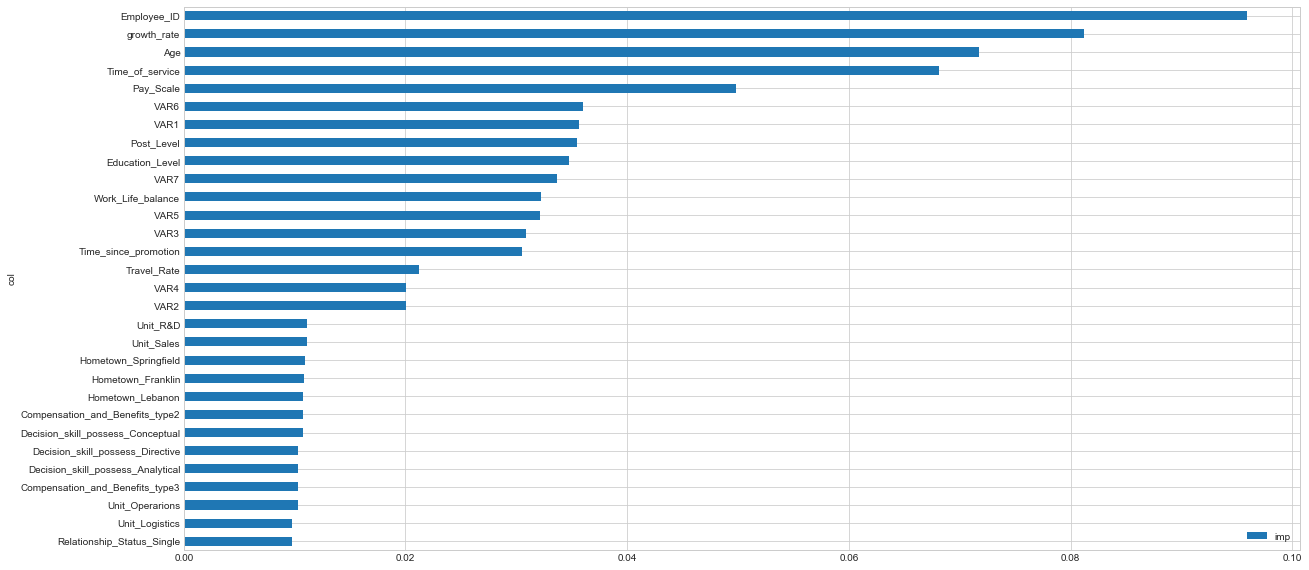

In [199]:
#Feature Importance
def feature_importance(model, data):
    
    fea_imp = pd.DataFrame({'imp': fin_model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True,False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

# Plot the feature importance scores
feature_importances = feature_importance(model, X_train)

In [200]:
feature_importances = feature_importances.sort_values(['imp'],ascending=False)
feature_importances.head()

,imp,col
0,0.095894,Employee_ID
5,0.081189,growth_rate
1,0.071787,Age
3,0.068147,Time_of_service
8,0.049796,Pay_Scale


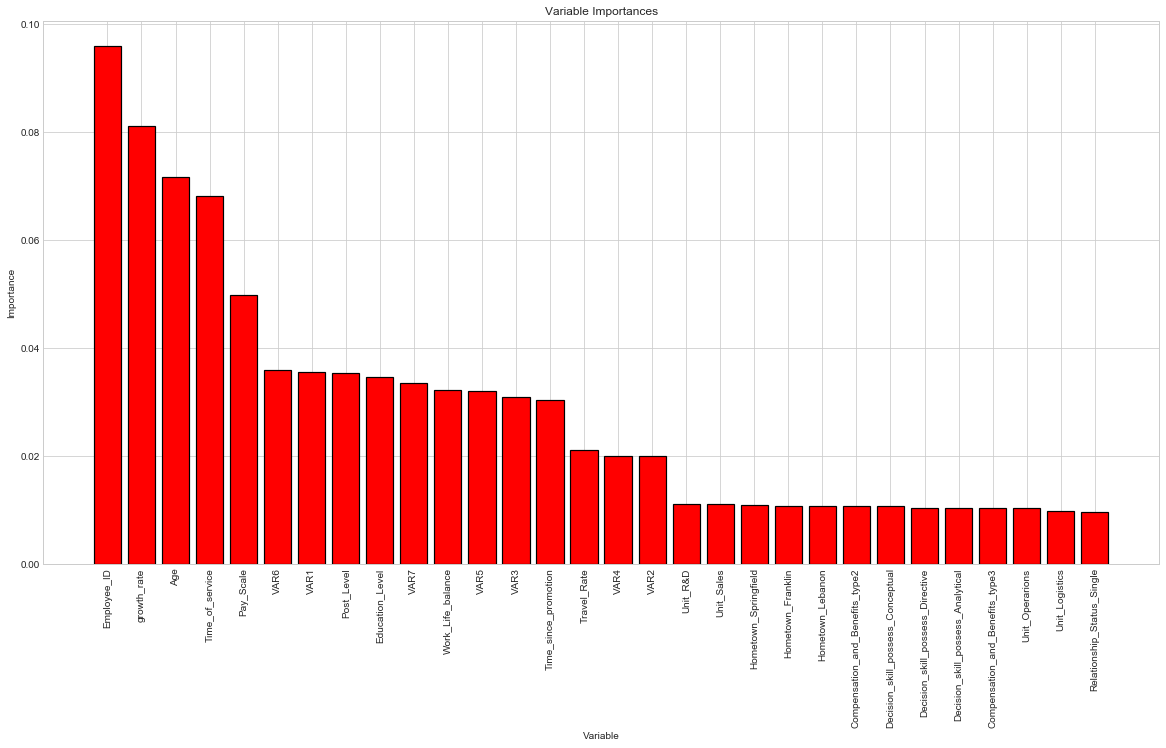

In [201]:
# list of x locations for plotting
x_values = list(range(len(feature_importances.imp)))# Make a bar chart
fig = plt.figure(figsize=(20,10))
plt.bar(x_values, feature_importances.imp, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)# Tick labels for x axis
plt.xticks(x_values, feature_importances.col, rotation='vertical')# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

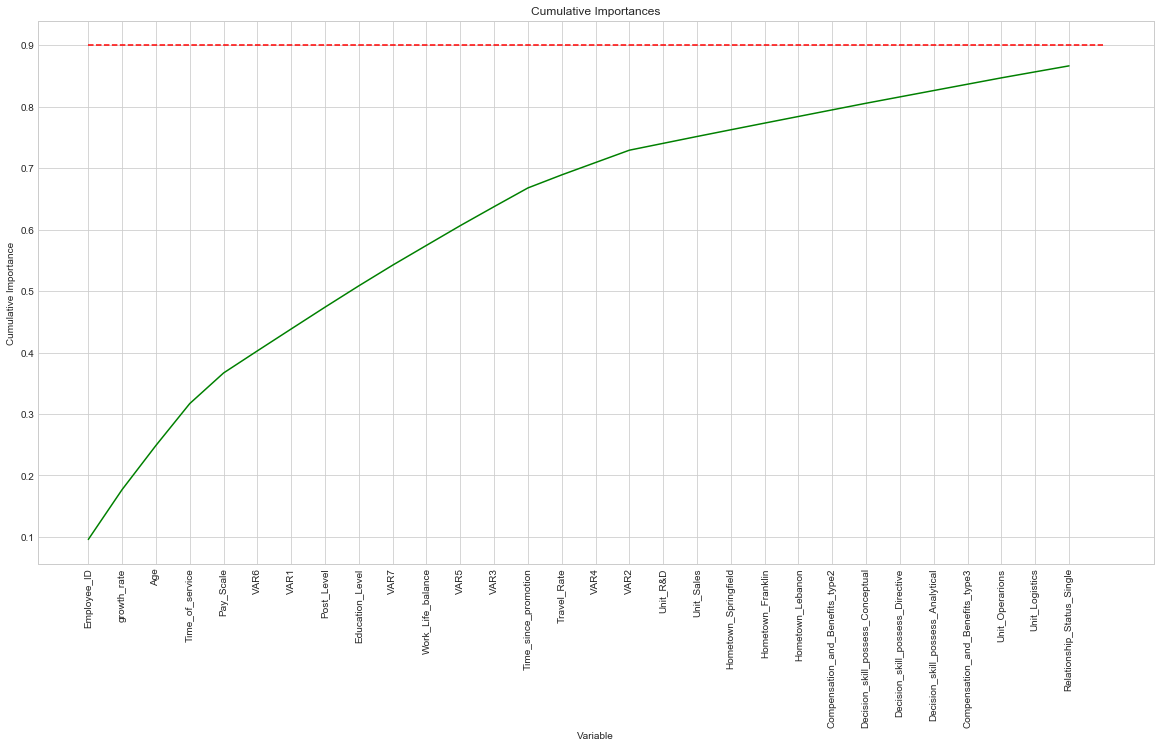

In [202]:
# List of features sorted from most to least important

sorted_importances = [importance for importance in feature_importances.imp]

sorted_features = [importance for importance in feature_importances.col]# Cumulative importances


cumulative_importances = np.cumsum(sorted_importances)# Make a line graph
fig = plt.figure(figsize=(20,10))
plt.plot(x_values, cumulative_importances, 'g-')# Draw line at 95% of importance retained

plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')# Format x ticks and labels

plt.xticks(x_values, sorted_features, rotation = 'vertical')# Axis labels and title

plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [205]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 85% importance:', np.where(cumulative_importances > 0.85)[0][0] + 1)

Number of features for 85% importance: 29


In [206]:
# Extract the names of the most important features
important_feature_names = [feature for feature in feature_importances.col[:29]]


important_train_features = X_train[important_feature_names]
important_test_features = X_test[important_feature_names]# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (7000, 29)
Important test features shape: (3000, 29)


In [207]:
# Train the expanded model on only the important features
fin_model.fit(important_train_features, y_train)
# Make predictions on test data
final_predictions = fin_model.predict(important_test_features)

In [208]:
# Our predictions array
final_predictions[:10]

array([0.23083117, 0.22723495, 0.19758944, 0.19987511, 0.22566148,
       0.18726094, 0.17584457, 0.21759592, 0.19817896, 0.19332332])

In [209]:
final_predictions = np.round(final_predictions,4)
final_predictions[:10]

array([0.2308, 0.2272, 0.1976, 0.1999, 0.2257, 0.1873, 0.1758, 0.2176,
       0.1982, 0.1933])

In [210]:
len(final_predictions)

3000

In [211]:
len(test.Employee_ID)

3000

In [212]:
# Create a submisison dataframe and append the relevant columns
final_submission = pd.DataFrame()
final_submission['Employee_ID']=test['Employee_ID']
final_submission['Attrition_rate'] = final_predictions # our model predictions on the test dataset
final_submission.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.2308
1,EID_9658,0.2272
2,EID_22203,0.1976
3,EID_7652,0.1999
4,EID_6516,0.2257


In [214]:
# Convert submisison dataframe to csv for submission to csv 
# for HackerEarth submisison
final_submission.to_csv('../final_rft_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [215]:
# Check the submission csv to make sure it's in the right format
final_submissions_check = pd.read_csv("../final_rft_submission.csv")
final_submissions_check.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.2308
1,EID_9658,0.2272
2,EID_22203,0.1976
3,EID_7652,0.1999
4,EID_6516,0.2257
